# 短文字壓縮測試

## 目的
不使用DB或任何存檔手段，將72字元無損壓縮成32內字元，以符合API限制。

## 現階段結果
- 因字串過短壓縮後又需用Base64轉成可被API傳送的字元，無法達32字元目標。
- 若資料量越大則壓縮效果越明顯但1k始終沒法達成目標。

## 思考方向
- 壓縮後結果不用Base64再轉字串，因爲Base64將會讓資料大4/3倍。

## 主流壓縮方式測試

### 72字元壓縮測試->目標32字元內

In [53]:
import string
import random
inStrCount = 72
inStr = ''.join(random.choices(string.ascii_uppercase + string.digits, k=inStrCount))
lenInStr = len(inStr)
print("InStr(" + str(len(inStr)) + "):" + inStr)

repeatStr = 'STACK OVERFLOW STACK OVERFLOW STACK OVERFLOW STACK OVERFLOW STACK OVERFLOW STACK OVERFLOW STACK OVERFLOW STACK OVERFLOW STACK OVERFLOW STACK OVERFLOW'
print("RepeatStr(" + str(len(repeatStr)) + "):" + repeatStr)


inStr100x = ''.join(random.choices(string.ascii_uppercase + string.digits, k=inStrCount*100))
lenInStr100x = len(inStr100x)
print("InStr 100x(" + str(len(inStr100x)) + ")")

compressResultLists = []

#Hex
import binascii
hexData = binascii.b2a_hex(inStr.encode("ascii"))
hexStr = hexData.decode("ascii")
print("InToHex(" + str(len(hexStr)) + "):" + hexStr)

#Base64 encode
import base64
def strBase64encodeToStr(oriStr):
    encodedBytes = base64.urlsafe_b64encode(oriStr.encode("utf-8"))
    encodedStr = str(encodedBytes, "utf-8")
    return encodedStr

def bytesBase64encodeToStr(oriBytes):
    encodedBytes = base64.urlsafe_b64encode(oriBytes)
    encodedStr = str(encodedBytes, "utf-8")
    return encodedStr

b64Str = strBase64encodeToStr(inStr)
b64Data = b64Str.encode("ascii")
print("InToBase64(" + str(len(b64Str)) + "):" + b64Str)

#bytesToStr
def bytesToStr(oriData):
    return bytesBase64encodeToStr(oriData)
    #return "".join( chr(x) for x in bytearray(oriData) )

#Brotli
print("\n=== Brotli(Google) ===")
!pip install brotli
import brotli

def bytesBrotliToStr(oriData):
    compressed = brotli.compress(oriData, quality=11)
    result = bytesToStr(compressed)
    return result


outStrOri = bytesBrotliToStr(inStr.encode("utf-8"))
lenStrOri =  len(outStrOri)
print("Out <Brotli> Ori(" + str(lenStrOri) + "):" + outStrOri)

outStrHex = bytesBrotliToStr(hexData)
lenStrHex =  len(outStrHex)
print("Out <Brotli> Hex(" + str(lenStrHex) + "):" + outStrHex)

outStrBase64 = bytesBrotliToStr(b64Data)
lenStrBase64 =  len(outStrBase64)
print("Out <Brotli> B64(" + str(lenStrBase64) + "):" + outStrBase64)

outStrRepeat = bytesBrotliToStr(repeatStr.encode("utf-8"))
lenStrRepeat =  len(outStrRepeat)
print("Out <Brotli> Repeat(" + str(lenStrRepeat) + "):" + outStrRepeat)

outStr100x = bytesBrotliToStr(inStr100x.encode("utf-8"))
lenStr100x =  len(outStr100x)
print("Out <Brotli> 100x(" + str(lenStr100x) + ")")

rateStr = lenStrOri / lenInStr
rateHex = lenStrHex / lenInStr
rateBase64 = lenStrBase64 / lenInStr
rateRepeat = lenStrRepeat / lenInStr
rateStr100x = lenStr100x / lenInStr100x

compressResultLists.append(['BROTLI', lenInStr, lenStrOri, rateStr, lenStrHex, rateHex, lenStrBase64, rateBase64, lenStrRepeat, rateRepeat, lenStr100x, rateStr100x])


#bzip2
print("\n=== bzip2 ===")
#!pip install bz2
import bz2

def bytesBzip2ToStr(oriData):
    compressed = bz2.compress(oriData)
    result = bytesToStr(compressed)
    return result


outStrOri = bytesBzip2ToStr(inStr.encode("utf-8"))
lenStrOri =  len(outStrOri)
print("Out <bzip2> Ori(" + str(lenStrOri) + "):" + outStrOri)

outStrHex = bytesBzip2ToStr(hexData)
lenStrHex =  len(outStrHex)
print("Out <bzip2> Hex(" + str(lenStrHex) + "):" + outStrHex)

outStrBase64 = bytesBzip2ToStr(b64Data)
lenStrBase64 =  len(outStrBase64)
print("Out <bzip2> B64(" + str(lenStrBase64) + "):" + outStrBase64)

outStrRepeat = bytesBzip2ToStr(repeatStr.encode("utf-8"))
lenStrRepeat =  len(outStrRepeat)
print("Out <bzip2> Repeat(" + str(lenStrRepeat) + "):" + outStrRepeat)

outStr100x = bytesBzip2ToStr(inStr100x.encode("utf-8"))
lenStr100x =  len(outStr100x)
print("Out <Brotli> 100x(" + str(lenStr100x) + ")")

rateStr = lenStrOri / lenInStr
rateHex = lenStrHex / lenInStr
rateBase64 = lenStrBase64 / lenInStr
rateRepeat = lenStrRepeat / lenInStr
rateStr100x = lenStr100x / lenInStr100x

compressResultLists.append(['BZIP2', lenInStr, lenStrOri, rateStr, lenStrHex, rateHex, lenStrBase64, rateBase64, lenStrRepeat, rateRepeat, lenStr100x, rateStr100x])


#lzma
print("\n=== lzma(7z) ===")
#!pip install lzma
import lzma

def bytesLzmaToStr(oriData):
    compressed = lzma.compress(oriData)
    result = bytesToStr(compressed)
    return result


outStrOri = bytesLzmaToStr(inStr.encode("utf-8"))
lenStrOri =  len(outStrOri)
print("Out <lzma> Ori(" + str(lenStrOri) + "):" + outStrOri)

outStrHex = bytesLzmaToStr(hexData)
lenStrHex =  len(outStrHex)
print("Out <lzma> Hex(" + str(lenStrHex) + "):" + outStrHex)

outStrBase64 = bytesLzmaToStr(b64Data)
lenStrBase64 =  len(outStrBase64)
print("Out <lzma> B64(" + str(lenStrBase64) + "):" + outStrBase64)

outStrRepeat = bytesLzmaToStr(repeatStr.encode("utf-8"))
lenStrRepeat =  len(outStrRepeat)
print("Out <lzma> Repeat(" + str(lenStrRepeat) + "):" + outStrRepeat)

outStr100x = bytesLzmaToStr(inStr100x.encode("utf-8"))
lenStr100x =  len(outStr100x)
print("Out <Brotli> 100x(" + str(lenStr100x) + ")")

rateStr = lenStrOri / lenInStr
rateHex = lenStrHex / lenInStr
rateBase64 = lenStrBase64 / lenInStr
rateRepeat = lenStrRepeat / lenInStr
rateStr100x = lenStr100x / lenInStr100x

compressResultLists.append(['LZMA', lenInStr, lenStrOri, rateStr, lenStrHex, rateHex, lenStrBase64, rateBase64, lenStrRepeat, rateRepeat, lenStr100x, rateStr100x])


#zstd
print("\n=== zstd(Facebook)===")
!pip install zstandard
import zstandard
      
def bytesZstdToStr(oriData):
    zstd = zstandard.ZstdCompressor()
    compressed = zstd.compress(oriData)
    result = bytesToStr(compressed)
    return result
      
      
outStrOri = bytesZstdToStr(inStr.encode("utf-8"))
lenStrOri =  len(outStrOri)
print("Out <zstd> Ori(" + str(lenStrOri) + "):" + outStrOri)

outStrHex = bytesZstdToStr(hexData)
lenStrHex =  len(outStrHex)
print("Out <zstd> Hex(" + str(lenStrHex) + "):" + outStrHex)

outStrBase64 = bytesZstdToStr(b64Data)
lenStrBase64 =  len(outStrBase64)
print("Out <zstd> B64(" + str(lenStrBase64) + "):" + outStrBase64)

outStrRepeat = bytesZstdToStr(repeatStr.encode("utf-8"))
lenStrRepeat =  len(outStrRepeat)
print("Out <zstd> Repeat(" + str(lenStrRepeat) + "):" + outStrRepeat)

outStr100x = bytesZstdToStr(inStr100x.encode("utf-8"))
lenStr100x =  len(outStr100x)
print("Out <Brotli> 100x(" + str(lenStr100x) + ")")

rateStr = lenStrOri / lenInStr
rateHex = lenStrHex / lenInStr
rateBase64 = lenStrBase64 / lenInStr
rateRepeat = lenStrRepeat / lenInStr
rateStr100x = lenStr100x / lenInStr100x

compressResultLists.append(['ZSTD', lenInStr, lenStrOri, rateStr, lenStrHex, rateHex, lenStrBase64, rateBase64, lenStrRepeat, rateRepeat, lenStr100x, rateStr100x])


InStr(72):YPXP9XD4CLOV38JVHWL362G4RKPCQL3LTJ5TQW6QZ8N6JU7O3IX1PHU9NR4AREXLARZ0B8KU
RepeatStr(149):STACK OVERFLOW STACK OVERFLOW STACK OVERFLOW STACK OVERFLOW STACK OVERFLOW STACK OVERFLOW STACK OVERFLOW STACK OVERFLOW STACK OVERFLOW STACK OVERFLOW
InStr 100x(7200)
InToHex(144):5950585039584434434c4f5633384a5648574c3336324734524b5043514c334c544a3554515736515a384e364a55374f33495831504855394e5234415245584c41525a3042384b55
InToBase64(96):WVBYUDlYRDRDTE9WMzhKVkhXTDM2Mkc0UktQQ1FMM0xUSjVUUVc2UVo4TjZKVTdPM0lYMVBIVTlOUjRBUkVYTEFSWjBCOEtV

=== Brotli(Google) ===
Out <Brotli> Ori(84):G0cA-GVwXqwDI_27ZEEpCujffKd8LTF13FjkOz4VMxTILtOsiuuZ6bketn7RWb74wOmFM16yb6K2eys_0KJc
Out <Brotli> Hex(108):G48A-AWszsoWm3C6EvOfMGgCXDyA22YdZFsQCI_fmaQ4TsrFSzIzWMHBtRE7L-EJJ4rdlWn3pPgyOZrFn7CtdBul2XyOQHegxaM7PGmMdBU=
Out <Brotli> B64(120):G18A-MVAO8f1wVUIdGm6AiqFYIofOovCmeroZCUrXeeW_LcjDtuZrkhADgvPHJ5C-A0h3teoPYzBIjC4RHo_H6GXnHhHR1D00Edm9rIAnK4bZfdFyeonAA==
Out <Brotli> Repeat(36):G5QA-I2Uq7NLOTRFVUFL5YpgJUBPmk8zAA==


## 比較壓縮率

        Method Origin C-Str              C-StrR C-Hex              C-HexR  \
BROTLI  BROTLI     72    84  1.1666666666666667   108                 1.5   
BZIP2    BZIP2     72   136  1.8888888888888888   148  2.0555555555555554   
LZMA      LZMA     72   172   2.388888888888889   236  3.2777777777777777   
ZSTD      ZSTD     72   108                 1.5   124  1.7222222222222223   

       C-Base64           C-Base64R C-Repeat           C-RepeatR C-Str100x  \
BROTLI      120  1.6666666666666667       36                 0.5      6272   
BZIP2       164  2.2777777777777777       88  1.2222222222222223      6388   
LZMA        204  2.8333333333333335      120  1.6666666666666667      6568   
ZSTD        132  1.8333333333333333       44  0.6111111111111112      6300   

                C-Str100xR  
BROTLI  0.8711111111111111  
BZIP2   0.8872222222222222  
LZMA    0.9122222222222223  
ZSTD                 0.875  


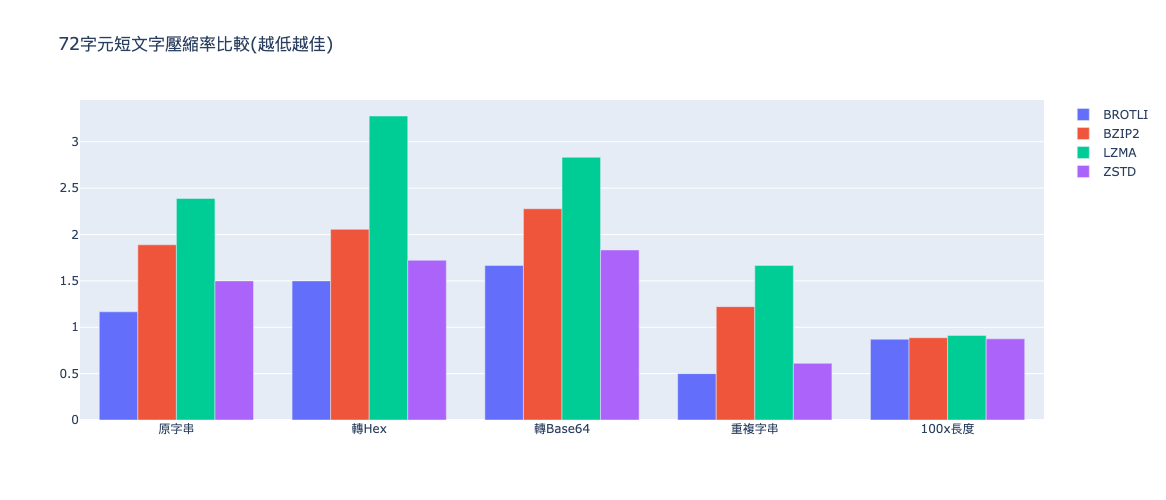

In [59]:
compressMethodList = ['BROTLI', 'BZIP2', 'LZMA', 'ZSTD']

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

compResNpArray = np.array(compressResultLists)
resultDF = pd.DataFrame(compResNpArray, columns=['Method','Origin', 'C-Str', 'C-StrR', 'C-Hex', 'C-HexR', 'C-Base64', 'C-Base64R', 'C-Repeat', 'C-RepeatR', 'C-Str100x', 'C-Str100xR'], index=compressMethodList)
print(resultDF)


rateDF = resultDF[['C-StrR', 'C-HexR', 'C-Base64R', 'C-RepeatR', 'C-Str100xR']]
rateLists = rateDF.values.tolist()

chartLabList = ['原字串', '轉Hex', '轉Base64', '重複字串', '100x長度']

!pip install plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Make figure with subplots
fig = make_subplots(rows=1, cols=1, specs=[[{"type": "bar"}]])

for idx, val in enumerate(rateLists):
    fig.add_trace(go.Bar(y=val ,x=chartLabList, name=compressMethodList[idx]), row=1, col=1)    


# Show legend
fig.update_layout(
    showlegend=True,
    title_text="72字元短文字壓縮率比較(越低越佳)",
    height=500,
    width=1000,
)

fig.show()

## 壓縮挑選法參考依據
https://quixdb.github.io/squash-benchmark/unstable/

    100% |████████████████████████████████| 215kB 7.6MB/s ta 0:00:01


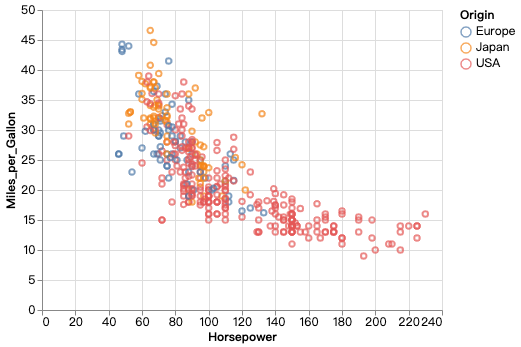

In [3]:
!pip install vega_datasets
!pip install altair 
import altair as alt

# to use with Jupyter notebook (not JupyterLab) run the following
# alt.renderers.enable('notebook')

# load a simple dataset as a pandas DataFrame
from vega_datasets import data
cars = data.cars()

alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
)
